# Data Augmentation on Cat Dog Data Set

Import necessary libraries.
We're using **PyTorch** here

In [0]:
import numpy
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

## Download the Cat Dog data set

In [15]:
!wget -c https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

!unzip -qq Cat_Dog_data.zip

--2019-04-26 18:03:10--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.227.115
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.227.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  43.8MB/s    in 13s     

2019-04-26 18:03:23 (42.0 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]

replace Cat_Dog_data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Function for showing the image

The image is normalized by adding its mean and multiplying by its standard deviation.

In [0]:
def imshow(image, img=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if img is None:
        fig, img = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    img.imshow(image)
    img.tick_params(axis='both', length=0)
    img.set_xticklabels('')
    img.set_yticklabels('')

    return img

## Data Augmentation
By performing augmentation, can prevent our model from learning irrelevant patterns, essentially boosting overall performance.

**Techniques**:
1. Flip
2. Rotation
3. Scale
4. Crop
5. Translation
6. Adding Noise


Some of these are applied here to cat and dog images.

Stating the **transform** function for the images

1. Random **resizing** images
2. **Cropping** the image - Randomly sample a section from the original image. Then resize this section to the original image size.

Load the images in a **batch of 32**

In [0]:
data = 'Cat_Dog_data/train'

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder(data, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

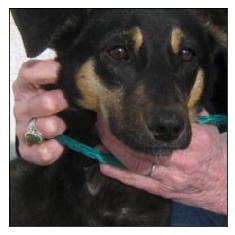

In [20]:
# Run this to test your data loader
images, labels = next(iter(dataloader))
imshow(images[0], normalize=False)

## Data Augmentation on training and test set

1. Random **rotation** of images of 30 degrees.
2. **Cropping** the image - Randomly sample a section from the original image. Then resize this section to the original image size.
3. Random **Flipping** of image - **Horizontal Flip**


In [0]:
data_dir = 'Cat_Dog_data'

# Transform for training data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()]) 

# Transform for test data
test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])

# Pass transforms in here
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

## Feature Extraction

**Global Features ** consist of :
1. Fourier Transform
2. Rapid Transform
3. Hough Transform
4. Gabor Transform

We are using inbuilt functions under OpenCV, mahotas and sklearn libraries for extractcing Global Features. These are the standard function for feature extraction in images.

These features which then will be passed to the **SVM Classifier**.

In [0]:
import cv2

def cvt_grey(image):   
    # convert the image to grayscale
    to_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(to_gray).mean(axis=0)
    return haralick

def cv_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features = cv2.HuMoments(cv2.moments(image)).flatten()
    return features
 
def cv_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    
    # normalize the histogram
    cv2.normalize(hist, hist)
    hist.flatten()